**Goal of the Code:** Create a figure to show how daily temperature conditions change under CCT and MSB. Plot a will show the histogram of the difference in TXx - Tmean JJA anomalies in the land region north of 50°N for RCP8.5 and CCT, while b will show the same for MSB. If the histogram of the RFGs is shifted to the right, this means that the TXx anomaly - Tmean anomaly (reference period is RCP8.5 2006-2026 of each pixel) is larger when the RFG reaches 2°C global warming than when RCP8.5 reaches 2°C global warming.


In [1]:
import numpy as np
import iris
import matplotlib.pyplot as plt
import matplotlib.cm as mpl_cm
import matplotlib
import matplotlib.ticker as ticker 
from matplotlib import cm
from matplotlib.colors import ListedColormap

Load the RCP8.5 datasets. We need the \_beg files to calculate the reference temperatures for the anomalies.

In [2]:
path = ""


landmask = iris.load(path + "TSA_01_sel_var_CCT.all.nc")[0][:,74:,:]

T_mean_RCP_beg = iris.load(path + "TSA_sel_var_RCP85.all.nc")[0][:21*12,74:,:]
T_mean_RCP_beg = T_mean_RCP_beg.data

TXx_RCP_beg = iris.load(path + "TREFMXAV_sel_var_RCP85.all.nc")[0][:21*12,74:,:].data

Land_Type=iris.load(path + "Land_Type.nc")[0][:,74:,:]
Land_Type.data.mask = landmask.data.mask


T_mean_RCP = iris.load(path + "tas_day_NorESM1-ME_rcp85_r1i1p1f1_gn_20200101-21001231.nc")[0][(34-14)*365:(34+21-14)*365,74:,:]
T_mean_RCP = T_mean_RCP.data

TXx_RCP = iris.load(path + "tasmax_day_NorESM1-ME_rcp85_r1i1p1_20200101-21001231.nc")[0][(34-14)*365:(34+21-14)*365,74:,:].data


C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\iris\fileformats\cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(
C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\iris\fileformats\cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tasmax'
  warnings.warn(


First, calculate the JJA mean TXx and JJA mean Tmean for each month and gridcell from 2006-2026. This is then used to calculate the daily anomaly of each gridcell in the 20 years when the scenario reaches 2°C global warming. TXx and Tmean anomalies are stored in two arrays for RCP8.5.

In [3]:
RCP = [] 
time = 0
else_sum = 0 ## to count all frequencies outside the 100x100 range to later have the correct divider (this mainly affects anomalies below -8.4 for both Tmean and TXx)

for lat in range(0,22):
        for lon in range(0,144):
            if Land_Type[0,lat,lon].data == 1:
                if landmask.data.mask[0,lat,lon] == False:
                    Jun_Mean = []
                    Jun_Max = []
                    Jul_Mean = []
                    Jul_Max = []
                    Aug_Mean = []
                    Aug_Max = []
                    while time in range(0, 21*12):
                        Jun_Mean.append(T_mean_RCP_beg[time + 5, lat, lon])
                        Jun_Max.append(TXx_RCP_beg[time + 5, lat, lon])
                        Jul_Mean.append(T_mean_RCP_beg[time + 6, lat, lon])
                        Jul_Max.append(TXx_RCP_beg[time + 6, lat, lon])
                        Aug_Mean.append(T_mean_RCP_beg[time + 7, lat, lon])
                        Aug_Max.append(TXx_RCP_beg[time + 7, lat, lon])
                        time = time + 12
                    RCP_Jun_Mean = np.mean(Jun_Mean)
                    RCP_Jun_Max = np.mean(Jun_Max)
                    RCP_Jul_Mean = np.mean(Jul_Mean)
                    RCP_Jul_Max = np.mean(Jul_Max)
                    RCP_Aug_Mean = np.mean(Aug_Mean)
                    RCP_Aug_Max = np.mean(Aug_Max)
                            
                    time = 0
                    
                    while time in range(0, 21*365):
                        for day in range(151, 151+30):
                            Anom_Tmean = T_mean_RCP[time+day,lat,lon] - RCP_Jun_Mean
                            Anom_TXx = TXx_RCP[time+day,lat,lon] - RCP_Jun_Max
                            RCP.append(Anom_TXx - Anom_Tmean)
                        for day in range(151+30, 151+30+31):
                            Anom_Tmean = T_mean_RCP[time+day,lat,lon] - RCP_Jul_Mean
                            Anom_TXx = TXx_RCP[time+day,lat,lon] - RCP_Jul_Max
                            RCP.append(Anom_TXx - Anom_Tmean)
                        for day in range(151+30+31, 151+30+31+31):
                            Anom_Tmean = T_mean_RCP[time+day,lat,lon] - RCP_Aug_Mean
                            Anom_TXx = TXx_RCP[time+day,lat,lon] - RCP_Aug_Max
                            RCP.append(Anom_TXx - Anom_Tmean)

                        time = time + 365  
                        
                    time = 0

Load the CCT and MSB daily TXx and Tmean temperature datasets.

In [4]:
path = r""


T_mean_CCT_01 = iris.load(path + "tas_day_NorESM1-ME_G6cct_r1i1p1f1_gn_20200101-21001231.nc")[0][(41)*365:(41+21)*365,74:,:]
T_mean_CCT_02 = iris.load(path + "tas_day_NorESM1-ME_G6cct_r2i1p1f1_gn_20200101-21001231.nc")[0][(37)*365:(37+21)*365,74:,:]
T_mean_CCT_03 = iris.load(path + "tas_day_NorESM1-ME_G6cct_r3i1p1f1_gn_20200101-21001231.nc")[0][(40)*365:(40+21)*365,74:,:]

T_mean_CCT_01.data.mask = landmask.data.mask
T_mean_CCT_02.data.mask = landmask.data.mask
T_mean_CCT_03.data.mask = landmask.data.mask

T_mean_CCT_01 = T_mean_CCT_01.data
T_mean_CCT_02 = T_mean_CCT_02.data
T_mean_CCT_03 = T_mean_CCT_03.data

T_mean_MSB_01 = iris.load(path + "tas_day_NorESM1-ME_G6ss_r1i1p1f1_gn_20200101-21001231.nc")[0][(42)*365:(42+21)*365,74:,:]
T_mean_MSB_02 = iris.load(path + "tas_day_NorESM1-ME_G6ss_r2i1p1f1_gn_20200101-21001231.nc")[0][(37)*365:(37+21)*365,74:,:]
T_mean_MSB_03 = iris.load(path + "tas_day_NorESM1-ME_G6ss_r3i1p1f1_gn_20200101-21001231.nc")[0][(38)*365:(38+21)*365,74:,:]

T_mean_MSB_01.data.mask = landmask.data.mask
T_mean_MSB_02.data.mask = landmask.data.mask
T_mean_MSB_03.data.mask = landmask.data.mask

T_mean_MSB_01 = T_mean_MSB_01.data
T_mean_MSB_02 = T_mean_MSB_02.data
T_mean_MSB_03 = T_mean_MSB_03.data

TXx_CCT_01 = iris.load(path + "tasmax_day_NorESM1-ME_G6cct_r1i1p1_20200101-21001231.nc")[0][(41)*365:(41+21)*365,74:,:].data
TXx_CCT_02 = iris.load(path + "tasmax_day_NorESM1-ME_G6cct_r2i1p1_20200101-21001231.nc")[0][(37)*365:(37+21)*365,74:,:].data
TXx_CCT_03 = iris.load(path + "tasmax_day_NorESM1-ME_G6cct_r3i1p1_20200101-21001231.nc")[0][(40)*365:(40+21)*365,74:,:].data

TXx_MSB_01 = iris.load(path + "tasmax_day_NorESM1-ME_G6ss_r1i1p1_20200101-21001231.nc")[0][(42)*365:(42+21)*365,74:,:].data
TXx_MSB_02 = iris.load(path + "tasmax_day_NorESM1-ME_G6ss_r2i1p1_20200101-21001231.nc")[0][(37)*365:(37+21)*365,74:,:].data
TXx_MSB_03 = iris.load(path + "tasmax_day_NorESM1-ME_G6ss_r3i1p1_20200101-21001231.nc")[0][(38)*365:(38+21)*365,74:,:].data

C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\iris\fileformats\cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(
C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\iris\fileformats\cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(
C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\iris\fileformats\cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(
C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\iris\fileformats\cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(
C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\iris\fileformats\cf.py:859: UserWarning: Missing CF-netCDF measure variable 'areacella', referenced by netCDF variable 'tas'
  warnings.warn(
C:\Users\rhonda\anac

First, calculate the JJA mean TXx and JJA mean Tmean for each month and gridcell from RCP8.5 2006-2026. This is then used to calculate the daily anomaly of each gridcell in the 20 years when the scenario reaches 2°C global warming. TXx and Tmean anomalies are stored in two arrays for each CCT and MSB. The three ensembled are not calculated as a mean.

In [5]:
CCT = []
MSB = []

time = 0
else_sum_CCT = 0
else_sum_MSB = 0

for lat in range(0,22):
        for lon in range(0,144):
            if Land_Type[0,lat,lon].data == 1:
                if landmask.data.mask[0,lat,lon] == False: ## only correct grid cells get looped through time
                    JJA_Mean_RCP = []
                    JJA_Max_RCP = []
                    Jun_Mean = []
                    Jun_Max = []
                    Jul_Mean = []
                    Jul_Max = []
                    Aug_Mean = []
                    Aug_Max = []
                    while time in range(0, 21*12):

                        JJA_Mean_RCP.append(T_mean_RCP_beg[time + 5: time + 8, lat, lon])
                        JJA_Max_RCP.append(TXx_RCP_beg[time + 5:time + 8, lat, lon])
                        Jun_Mean.append(T_mean_RCP_beg[time + 5, lat, lon])
                        Jun_Max.append(TXx_RCP_beg[time + 5, lat, lon])
                        Jul_Mean.append(T_mean_RCP_beg[time + 6, lat, lon])
                        Jul_Max.append(TXx_RCP_beg[time + 6, lat, lon])
                        Aug_Mean.append(T_mean_RCP_beg[time + 7, lat, lon])
                        Aug_Max.append(TXx_RCP_beg[time + 7, lat, lon])
                        
                        time = time + 12
       
                    RCP_Jun_Mean = np.mean(Jun_Mean)
                    RCP_Jun_Max = np.mean(Jun_Max)
                    RCP_Jul_Mean = np.mean(Jul_Mean)
                    RCP_Jul_Max = np.mean(Jul_Max)
                    RCP_Aug_Mean = np.mean(Aug_Mean)
                    RCP_Aug_Max = np.mean(Aug_Max)
                            
                    time = 0
                    
                    while time in range(0, 21*365):
                        for day in range(151, 151+30):
                            Anom_Tmean = T_mean_CCT_01[time+day,lat,lon] - RCP_Jun_Mean
                            Anom_TXx = TXx_CCT_01[time+day,lat,lon] - RCP_Jun_Max
                            CCT.append(Anom_TXx - Anom_Tmean)
                            Anom_Tmean = T_mean_CCT_02[time+day,lat,lon] - RCP_Jun_Mean
                            Anom_TXx = TXx_CCT_02[time+day,lat,lon] - RCP_Jun_Max
                            CCT.append(Anom_TXx - Anom_Tmean)
                            Anom_Tmean = T_mean_CCT_03[time+day,lat,lon] - RCP_Jun_Mean
                            Anom_TXx = TXx_CCT_03[time+day,lat,lon] - RCP_Jun_Max
                            CCT.append(Anom_TXx - Anom_Tmean)
                            
                            Anom_Tmean = T_mean_MSB_01[time+day,lat,lon] - RCP_Jun_Mean
                            Anom_TXx = TXx_MSB_01[time+day,lat,lon] - RCP_Jun_Max
                            MSB.append(Anom_TXx - Anom_Tmean)
                            Anom_Tmean = T_mean_MSB_02[time+day,lat,lon] - RCP_Jun_Mean
                            Anom_TXx = TXx_MSB_02[time+day,lat,lon] - RCP_Jun_Max
                            MSB.append(Anom_TXx - Anom_Tmean)
                            Anom_Tmean = T_mean_MSB_03[time+day,lat,lon] - RCP_Jun_Mean
                            Anom_TXx = TXx_MSB_03[time+day,lat,lon] - RCP_Jun_Max
                            MSB.append(Anom_TXx - Anom_Tmean)
                            
                        for day in range(151+30, 151+30+31):
                            Anom_Tmean = T_mean_CCT_01[time+day,lat,lon] - RCP_Jun_Mean
                            Anom_TXx = TXx_CCT_01[time+day,lat,lon] - RCP_Jun_Max
                            CCT.append(Anom_TXx - Anom_Tmean)
                            Anom_Tmean = T_mean_CCT_02[time+day,lat,lon] - RCP_Jun_Mean
                            Anom_TXx = TXx_CCT_02[time+day,lat,lon] - RCP_Jun_Max
                            CCT.append(Anom_TXx - Anom_Tmean)
                            Anom_Tmean = T_mean_CCT_03[time+day,lat,lon] - RCP_Jun_Mean
                            Anom_TXx = TXx_CCT_03[time+day,lat,lon] - RCP_Jun_Max
                            CCT.append(Anom_TXx - Anom_Tmean)
                            
                            Anom_Tmean = T_mean_MSB_01[time+day,lat,lon] - RCP_Jun_Mean
                            Anom_TXx = TXx_MSB_01[time+day,lat,lon] - RCP_Jun_Max
                            MSB.append(Anom_TXx - Anom_Tmean)
                            Anom_Tmean = T_mean_MSB_02[time+day,lat,lon] - RCP_Jun_Mean
                            Anom_TXx = TXx_MSB_02[time+day,lat,lon] - RCP_Jun_Max
                            MSB.append(Anom_TXx - Anom_Tmean)
                            Anom_Tmean = T_mean_MSB_03[time+day,lat,lon] - RCP_Jun_Mean
                            Anom_TXx = TXx_MSB_03[time+day,lat,lon] - RCP_Jun_Max
                            MSB.append(Anom_TXx - Anom_Tmean)
                            
                        for day in range(151+30+31, 151+30+31+31):
                            Anom_Tmean = T_mean_CCT_01[time+day,lat,lon] - RCP_Jun_Mean
                            Anom_TXx = TXx_CCT_01[time+day,lat,lon] - RCP_Jun_Max
                            CCT.append(Anom_TXx - Anom_Tmean)
                            Anom_Tmean = T_mean_CCT_02[time+day,lat,lon] - RCP_Jun_Mean
                            Anom_TXx = TXx_CCT_02[time+day,lat,lon] - RCP_Jun_Max
                            CCT.append(Anom_TXx - Anom_Tmean)
                            Anom_Tmean = T_mean_CCT_03[time+day,lat,lon] - RCP_Jun_Mean
                            Anom_TXx = TXx_CCT_03[time+day,lat,lon] - RCP_Jun_Max
                            CCT.append(Anom_TXx - Anom_Tmean)
                            
                            Anom_Tmean = T_mean_MSB_01[time+day,lat,lon] - RCP_Jun_Mean
                            Anom_TXx = TXx_MSB_01[time+day,lat,lon] - RCP_Jun_Max
                            MSB.append(Anom_TXx - Anom_Tmean)
                            Anom_Tmean = T_mean_MSB_02[time+day,lat,lon] - RCP_Jun_Mean
                            Anom_TXx = TXx_MSB_02[time+day,lat,lon] - RCP_Jun_Max
                            MSB.append(Anom_TXx - Anom_Tmean)
                            Anom_Tmean = T_mean_MSB_03[time+day,lat,lon] - RCP_Jun_Mean
                            Anom_TXx = TXx_MSB_03[time+day,lat,lon] - RCP_Jun_Max
                            MSB.append(Anom_TXx - Anom_Tmean)

                        time = time + 365  
                        
                    time = 0


Plotting of the histograms.

C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\rhonda\anaconda3\envs\py3k\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

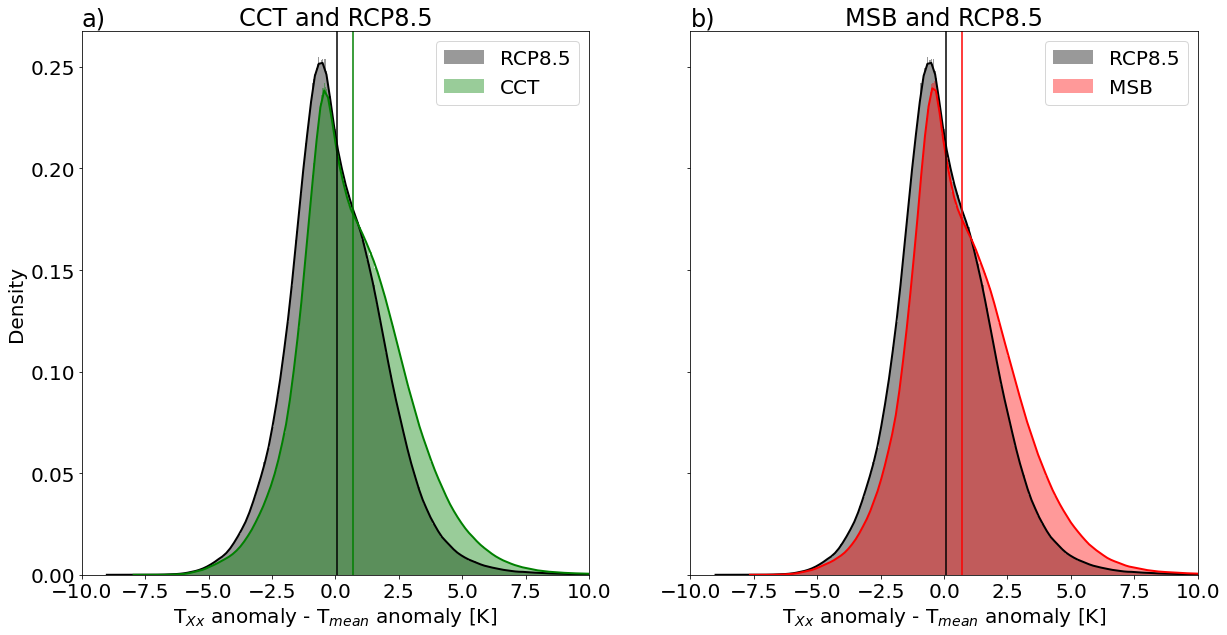

In [7]:
import seaborn as sns

matplotlib.rcParams.update({'font.size': 20})
n_bins = 300
binwidth = 0.05
n_bins_RCP = int((max(RCP)-min(RCP))/binwidth)
n_bins_CCT = int((max(CCT)-min(CCT))/binwidth)
n_bins_MSB = int((max(MSB)-min(MSB))/binwidth)

fig, axes = plt.subplots(1, 2, figsize=(20, 10), sharey=True)

im1 = sns.distplot(RCP, ax=axes[0],  hist=True, kde=True, bins=n_bins_RCP, color = 'black',  kde_kws={'linewidth': 2}, label = "RCP8.5")
sns.distplot(CCT, ax=axes[0],  hist=True, kde=True, bins=n_bins_CCT, color = 'green',  kde_kws={'linewidth': 2}, label = "CCT")
axes[0].axvline(np.mean(RCP), color = "black")
axes[0].axvline(np.mean(CCT), color = "green")
im1.set(xlim=(-10,10), xlabel='T$_{Xx}$ anomaly - T$_{mean}$ anomaly [K]')
im1.set_title("CCT and RCP8.5")
im1.set_title('a)', loc='left')
im1.legend()

im2 = sns.distplot(RCP, ax=axes[1],  hist=True, kde=True, bins=n_bins_RCP, color = 'black',  kde_kws={'linewidth': 2}, label = "RCP8.5")
sns.distplot(MSB, ax=axes[1],  hist=True, kde=True, bins=n_bins_MSB, color = 'red',  kde_kws={'linewidth': 2}, label = "MSB")
axes[1].axvline(np.mean(RCP), color = "black")
axes[1].axvline(np.mean(MSB), color = "red")
im2.set(xlim=(-10,10), xlabel='T$_{Xx}$ anomaly - T$_{mean}$ anomaly [K]')
im2.set_title("MSB and RCP8.5")
im2.set_title('b)', loc='left')
im2.legend()
